In [23]:
# this batch normalization tech also used to increase the score remove the varnish dradient dex=cent problen 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [24]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [25]:
 data.drop(columns=["RowNumber","CustomerId","Surname","Geography","Gender"],inplace = True)
# adjust it according to wscubetech 

In [26]:
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [27]:
data.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
input_data = data.iloc[:,:-1]
output_data = data.iloc[:,-1]

In [29]:
from sklearn.preprocessing import StandardScaler
# we have to scale every data we sue in deep learning 

In [30]:
ss = StandardScaler()
ss.fit_transform(input_data)

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [31]:
input_data1 = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [32]:
input_data1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [35]:
input_data.shape

(10000, 8)

In [36]:
x_train.shape

(8000, 8)

In [48]:
# now we create a artificial neural network 
import tensorflow
from keras.layers import Dense,BatchNormalization #explain in reg 
from keras.models import Sequential
from keras.callbacks import EarlyStopping # new one 
# these helps in on creating ann 
from keras.regularizers import l2

In [38]:
input_data1.shape # we creaet nodes accoring to it 

(10000, 8)

In [54]:
ann = Sequential()
ann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=l2(l2=0.01))) #new one kernel
# regulizer used to improve the accuracy expliain in achine learning topic 
ann.add(BatchNormalization())# it removes the varnish gradient problem and also improve accuracy
ann.add(Dense(4,activation="relu"))
ann.add(BatchNormalization())
ann.add(Dense(2,activation="relu"))
ann.add(BatchNormalization()) # donot use this in output mean last one layer bcz data is in 0,1

ann.add(Dense(1,activation="sigmoid"))
# these all our hidden layer 1,2,3,4 

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# now ann network is complete and we compile it 
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# optimizer best is adam as register loss also explain 

In [56]:
x_train.shape

(8000, 8)

In [57]:
ann.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test),callbacks =EarlyStopping())
# batech size depend upon our train size and epoch mean how many time we want to train validation
# is used to check the accuracy below in history callbacks early sEarlyStopping stops the model 
# from where accuracy changes and conot properly trained to model for ex it stops it at 3 epochs

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5721 - loss: 0.8456 - val_accuracy: 0.7840 - val_loss: 0.7044
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7367 - loss: 0.7349 - val_accuracy: 0.8000 - val_loss: 0.6274
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7575 - loss: 0.6852 - val_accuracy: 0.8020 - val_loss: 0.5897
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7526 - loss: 0.6432 - val_accuracy: 0.8035 - val_loss: 0.5661
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.5737 - val_accuracy: 0.8035 - val_loss: 0.5413
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7880 - loss: 0.5548 - val_accuracy: 0.8035 - val_loss: 0.5216
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.5285 - val_accuracy: 0.8035 - val_loss: 0.5096
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7919 - loss: 0.5209 - val_accuracy: 0.8035 - val_loss:

In [58]:
ann.history.history # here we find accuracies of testing trainning and loss now we assign 
#  single to everyone 

{'accuracy': [0.6520000100135803,
  0.7472500205039978,
  0.749875009059906,
  0.7693750262260437,
  0.793874979019165,
  0.7943750023841858,
  0.7943750023841858,
  0.7943750023841858,
  0.7943750023841858,
  0.7944999933242798,
  0.7944999933242798,
  0.7943750023841858],
 'loss': [0.8139936327934265,
  0.7227090001106262,
  0.6755834221839905,
  0.6206944584846497,
  0.5688480138778687,
  0.5447948575019836,
  0.5279959440231323,
  0.5172364711761475,
  0.5108283758163452,
  0.5070052146911621,
  0.5053199529647827,
  0.5041886568069458],
 'val_accuracy': [0.7839999794960022,
  0.800000011920929,
  0.8019999861717224,
  0.8034999966621399,
  0.8034999966621399,
  0.8034999966621399,
  0.8034999966621399,
  0.8034999966621399,
  0.8034999966621399,
  0.8034999966621399,
  0.8034999966621399,
  0.8029999732971191],
 'val_loss': [0.7043928503990173,
  0.6274235248565674,
  0.5896582007408142,
  0.5660938024520874,
  0.5413092970848083,
  0.5216290354728699,
  0.5096351504325867,
  0.50

In [59]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"] 
# now we plot a graph in matplotlib 

In [60]:
# now we find the length to draw the graph 
len(train_accuracy),len(test_accuracy)

(12, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

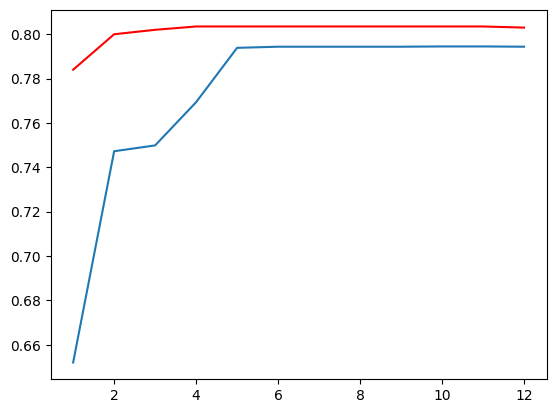

In [63]:
plt.plot([i for i in range(1,13)],train_accuracy)
plt.plot([i for i in range(1,13)],test_accuracy,color = "red")
plt.show 
# there is slight differnece between both as shown below in score function 

In [64]:
# created for below 
yprd = ann.predict(x_test) 
yprd

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.18423225],
       [0.15024358],
       [0.14511153],
       ...,
       [0.14366536],
       [0.14616178],
       [0.26378247]], dtype=float32)

In [65]:
# now we create a loop bcz we want output in 0 1 so convert less than 0.5 to 0 and other to 1 
prd_data = []
for i in yprd: 
    # print(i[0])# it is in list so we use [0] 
    if i[0] > 0.5: 
        prd_data.append(1)
    else: 
        prd_data.append(0)

In [66]:
# now we have to check the accuracy of our model it is done through skearn 
from sklearn.metrics import accuracy_score

In [67]:
acs  = accuracy_score(y_test,prd_data)# it need y pred so first we find it above 

In [68]:
acs # accuracy is 80 per now let we check our model is in overfitting or not 

0.803

In [69]:
# now we create a loop bcz we want output in 0 1 so convert less than 0.5 to 0 and other to 1 
yprd1 = ann.predict(x_train) 
prd_data1 = []
for i in yprd1: 
    # print(i[0])# it is in list so we use [0] 
    if i[0] > 0.5: 
        prd_data1.append(1)
    else: 
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [71]:
acs  = accuracy_score(y_train,prd_data1)

In [72]:
acs # so it is saved from overfitting 

0.794375